In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
img = np.full((1200, 1200, 3), 255, np.uint8)

thickness = 2

cv2.rectangle(img, (100, 100), (300, 300), (255, 0, 0), thickness=thickness)
cv2.rectangle(img, (900, 100), (1100, 300), (255, 0, 0), thickness=thickness)
cv2.rectangle(img, (530, 530), (680, 680), (255, 0, 0), thickness=thickness)
cv2.rectangle(img, (100, 900), (300, 1100), (255, 0, 0), thickness=thickness)
cv2.rectangle(img, (900, 900), (1100, 1100), (255, 0, 0), thickness=thickness)
cv2.rectangle(img, (450, 350), (750, 500), (255, 0, 0), thickness=thickness)
cv2.rectangle(img, (450, 710), (750, 860), (255, 0, 0), thickness=thickness)
cv2.rectangle(img, (250, 450), (400, 750), (255, 0, 0), thickness=thickness)
cv2.rectangle(img, (810, 450), (960, 750), (255, 0, 0), thickness=thickness)
# cv2.line(img, (100, 200), (700, 600), (255, 0, 0), thickness=thickness)
# cv2.line(img, (700, 200), (100, 600), (255, 0, 0), thickness=thickness)

img2 = np.zeros_like(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(th)

In [3]:
colors = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [0, 255, 255], [255, 174, 0], [0,0,0], [159, 73, 252]] # red, green, blue, sky, orange, black, purple

In [25]:
colors = list()
for _ in range(cnt):
    colors.append([int(j) for j in np.random.randint(0, 255, 3)])

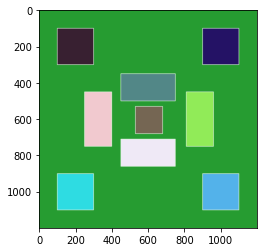

In [44]:
for i in range(cnt):
    img2[labels==i] = colors[i]
    # img2[labels==i] = colors[i]

plt.imshow(img2)

In [45]:
temp = img2.copy()

In [46]:
temp[150][140] = [0,0,0]#[[0,0,0] for _ in range(800)]

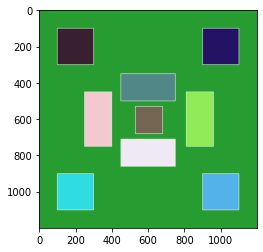

In [47]:
plt.imshow(temp)

In [48]:
data = pd.DataFrame(columns=['x','y','label'])

In [59]:
for _ in range(10000):
    x = np.random.randint(0, 1200)
    y = np.random.randint(0, 1200)
    label = labels[y][x]
    temp = pd.DataFrame({'x':[x], 'y':[y], 'label':[label]})

    data = data.append(temp, ignore_index=True)

X_data = data.drop(columns=['label']).values
y_data = data['label'].values

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

X_train = tf.convert_to_tensor(X_train, dtype=tf.int32)
X_val = tf.convert_to_tensor(X_val, dtype=tf.int32)
# X_test = tf.convert_to_tensor(X_test, dtype=tf.int32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.int32)
# y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [60]:
model = Sequential([
    InputLayer(input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(11, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 11)                715       
Total params: 17,483
Trainable params: 17,483
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [62]:
early_stopping = EarlyStopping(monitor='val_loss', patience=50, mode='auto')

In [63]:
hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=128, validation_batch_size=128, epochs=300, callbacks=[early_stopping])

Epoch 1/300
125/125 [==============================] - 0s 3ms/step - loss: 3.7257 - accuracy: 0.6449 - val_loss: 1.2162 - val_accuracy: 0.7172
Epoch 2/300
125/125 [==============================] - 0s 1ms/step - loss: 1.1041 - accuracy: 0.6683 - val_loss: 0.9287 - val_accuracy: 0.6720
Epoch 3/300
125/125 [==============================] - 0s 1ms/step - loss: 1.0396 - accuracy: 0.6746 - val_loss: 1.0245 - val_accuracy: 0.6785
Epoch 4/300
125/125 [==============================] - 0s 1ms/step - loss: 1.0402 - accuracy: 0.6743 - val_loss: 0.9036 - val_accuracy: 0.6520
Epoch 5/300
125/125 [==============================] - 0s 1ms/step - loss: 0.9665 - accuracy: 0.6807 - val_loss: 0.9163 - val_accuracy: 0.6645
Epoch 6/300
125/125 [==============================] - 0s 1ms/step - loss: 0.9522 - accuracy: 0.6791 - val_loss: 0.9018 - val_accuracy: 0.7020
Epoch 7/300
125/125 [==============================] - 0s 1ms/step - loss: 0.9116 - accuracy: 0.6842 - val_loss: 0.9538 - val_accuracy: 0.7165

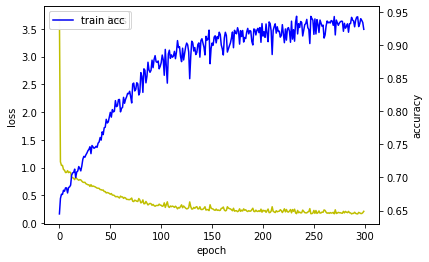

In [64]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
# loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
# acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [65]:
test_data = pd.DataFrame(columns=['x','y','label'])
for _ in range(10000):
    x = np.random.randint(0, 800)
    y = np.random.randint(0, 800)
    label = labels[y][x]
    temp = pd.DataFrame({'x':[x], 'y':[y], 'label':[label]})

    test_data = test_data.append(temp, ignore_index=True)

In [66]:
X_test = test_data.drop(columns=['label']).values
y_test = test_data['label'].values
X_test = tf.convert_to_tensor(X_test, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [67]:
model.evaluate(X_test, y_test, batch_size=128)

79/79 [==============================] - 0s 2ms/step - loss: 0.1355 - accuracy: 0.9580


[0.13551931083202362, 0.9580000042915344]